# Best Fit Line

today we are going to write our own code for fitting a line and then comparing it to differnt functions in python.  We are going to take our math form Daniel C. Harris, Quantitative Chemical Analysis pages 66 and 67.  

To begin we are going to cheat and make our lives easier and use the numpy package.  This package lets us do some array operations really easily and we won't have to do for loops.  I was thinking of being mean and using all for loops.  But lets take advantage of python.  First lets import numpy and see what we can do.  

In [1]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import numpy as np
x=np.array([1.,3,4,6])
print x
type(x)

[ 1.  3.  4.  6.]


numpy.ndarray

So we could enter a list but instead of calling it a list we call it a numpy array.  This is like a supercharged list.  

Now we can make the y

In [3]:
y=np.array([2,3,4,5])

Now this is where numpy gets really cool.  you can multiply and add your lists.  This is different than array math if you have taken linear algebra.  But we will be able to do that also.  

In [4]:
print x*y

[  2.   9.  16.  30.]


In [5]:
print x+y

[  3.   6.   8.  11.]


In [6]:
print x-y

[-1.  0.  0.  1.]


In [7]:
print x/y

[ 0.5  1.   1.   1.2]


In [8]:
print x%y

[ 1.  0.  0.  1.]


If you are doing linear algebra there are methods to do true matrix multiplication.   For example the dot product. 

In [9]:
print np.dot(x,y)

57.0


In [10]:
print np.sum(x)

14.0


In [11]:
print len(x)

4


In [12]:
np.

SyntaxError: invalid syntax (<ipython-input-12-a58a88215da2>, line 1)

I have now given you all the tools you need to figure out the best fit equation of a line.  Remember the best fit equation of the line is y=mx+b where m is the slope and b is the intercept. To do the fit when you have multiple points you get the equations 

$m=\frac{(n\Sigma x_i y_i - \Sigma x_i \Sigma y_i)}{(n\Sigma (x_i^2)  - (\Sigma x_i)^2)}  $

$b=\frac{\Sigma(x_i^2) \Sigma y_i - (\Sigma x_i y_i)\Sigma x_i)}{n\Sigma (x_i^2) - (\Sigma x_i)^2}$

remember $x_i$ means for each element in the list of x. so in our case $x_0 = 1, x_1=3, x_2=4,x_3=6$ and if we sum up all of one list that is $\Sigma x_i=1+3+4+6=14$  

So lets plot our x and y data, look at it and then fit it.  

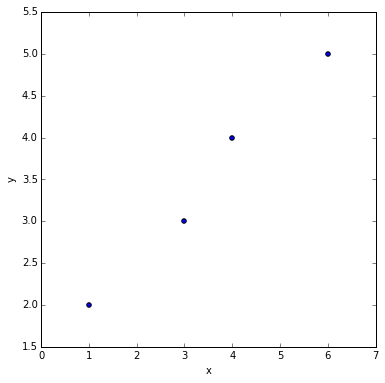

In [4]:
% matplotlib inline
import matplotlib.pylab as plt

fig,ax=plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')

So go ahead and figure out your m and b and then plot the line on the graph.  

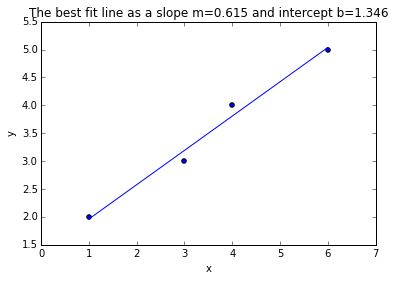

Lets compare our answer to two ways to figure out a line in python.  They are polyfit and linregress.  There are more.  But lets start with those.  So we will start by getting help on polyfit.   Polyfit is from numpy.  

In [14]:
?np.polyfit

Polyfit will return us the m and b.  The strength of polyfit is two fold.  First you can do higher order by changing the third parameter and also it makes it easy to fit your data.  

In [16]:
np.polyfit(x,y,1)

array([ 0.61538462,  1.34615385])

So you could do second order.  where you get the best fit y=a$x^2$+bx+c

In [17]:
np.polyfit(x,y,2)

array([  8.89769948e-17,   6.15384615e-01,   1.34615385e+00])

Now how can we get the fit?

In [19]:
fit=np.polyfit(x,y,2)
print fit

[  8.89769948e-17   6.15384615e-01   1.34615385e+00]


In [20]:
eqn=np.poly1d(fit)

In [21]:
print eqn

           2
8.898e-17 x + 0.6154 x + 1.346


Now lets pass a value to eqn

In [23]:
eqn(10)

7.5000000000000071

In [24]:
eqn(np.linspace(-10,10))

array([-4.80769231, -4.55651491, -4.30533752, -4.05416013, -3.80298273,
       -3.55180534, -3.30062794, -3.04945055, -2.79827316, -2.54709576,
       -2.29591837, -2.04474097, -1.79356358, -1.54238619, -1.29120879,
       -1.0400314 , -0.788854  , -0.53767661, -0.28649922, -0.03532182,
        0.21585557,  0.46703297,  0.71821036,  0.96938776,  1.22056515,
        1.47174254,  1.72291994,  1.97409733,  2.22527473,  2.47645212,
        2.72762951,  2.97880691,  3.2299843 ,  3.4811617 ,  3.73233909,
        3.98351648,  4.23469388,  4.48587127,  4.73704867,  4.98822606,
        5.23940345,  5.49058085,  5.74175824,  5.99293564,  6.24411303,
        6.49529042,  6.74646782,  6.99764521,  7.24882261,  7.5       ])

Poly1d doesn't do everything we want.  But if you need to fit a higher order equation and print the equation it is really nice

I like linregress from scipy for my basic line fitting.  the strength it has over polyfit is that it returns a p-value and an r$^2$ along with the slope and intercept.  Lets learn about it!

In [27]:
?stats.linregress

The key is we give it an x and y and then it returns
Returns
-------
slope : float
    slope of the regression line
intercept : float
    intercept of the regression line
r-value : float
    correlation coefficient
p-value : float
    two-sided p-value for a hypothesis test whose null hypothesis is
    that the slope is zero.
stderr : float
    Standard error of the estimate

In [28]:
stats.linregress(x,y)

(0.61538461538461542,
 1.3461538461538458,
 0.99227787671366774,
 0.0077221232863322574,
 0.054392829322041827)

Why do I like stats.linregress?  Becuase it gives us the r-value (square it and you have the r-squared) and the p-value.   How do these results compare against yours that you calculated?

But if you want to use your stats results set it equal to something, it will make a list and then you can access it.  Or you can set each item.  so the two ways are..

In [29]:
stats_out=stats.linregress(x,y)

In [30]:
stats_out[0]

0.61538461538461542

In [31]:
stats_out

(0.61538461538461542,
 1.3461538461538458,
 0.99227787671366774,
 0.0077221232863322574,
 0.054392829322041827)

In [32]:
slope, intercept, r_value,p_value,stderr= stats.linregress(x,y)

In [33]:
slope

0.61538461538461542

In [34]:
intercept

1.3461538461538458

so it is up to you on how you want to get to the data from a function like stats.linregress()

One thing I have problems with is long lines I want on multiple lines.  For example sometimes I like to define a long string and then use that string as a title.  To have it go over multiple lines you can use brackets.  here is an example of a long string I made for a title.   You can see me accessing the results both ways.  

In [35]:
title=('The best fit line as a slope m={:.3f} and intercept b={:.3f}'.format(stats_out[0],stats_out[1])+
       '\nbest fit line linregress slope m={:.3f} and intercept b={:.3f} '.format(slope,intercept))
print title


The best fit line as a slope m=0.615 and intercept b=1.346
best fit line linregress slope m=0.615 and intercept b=1.346 


Now can you go back and get the KNYC and KLGA weather data and see if they are correlated?  I would use your program and then compare to linregress.  Remember to use np.array([]) to enter the data as a numpy array.  Also remember you need at least one float in your list to make it all floats.  

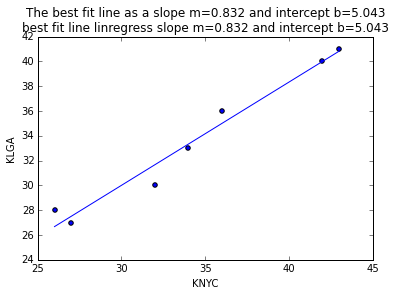

Sometimes when making a graph, instead of putting in a title it looks better to put in a text box with just the details.  It is a three step process to make a nice box.

1.  First you define the box by making a dictionary of the box properties.  We ususally call it props for the properties of the box.

2.  Then you make the text string you want in the box.  for a linear equation you usually won't slope, interecept, r$^2$, and p-value

3.  You then say where you want the information.  This is within the ax properties since we will put it into the graph.  You tell it the relative location, Then you give it the text, somemore information, and then the props

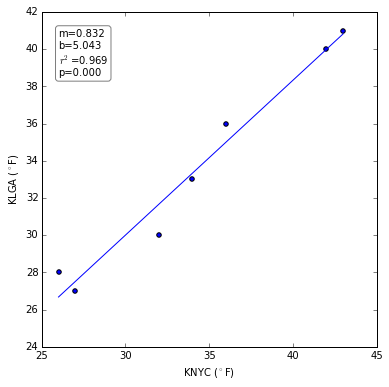

In [14]:
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results[0],results[1],results[2]**2,results[3])
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)

# Answer
See notebook when posted.  It will show you how to make a prettier figure.....